<a href="https://colab.research.google.com/github/RamMohan112/Assignement_J/blob/master/Solution_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Defining Data

X = np.array([[1,1],[-1,-1],[0,0.5],[0.1,0.5],[0.2,0.2],[0.9,0.5]])
X.shape
Y = np.array([1,-1,-1,-1,1,1])
Y.shape

(6,)

In [ ]:
class Perceptron:

  def __init__ (self):
    self.w = None


  def model(self, x):
    return 1 if (np.dot(self.w, x) >= 0) else -1              


  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  

  def fit(self, X, Y):

    self.w = np.ones(X.shape[1])
    

    accuracy = 0
    
    wt_matrix = []
    convergence_flag = False
    steps = 0

    x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])
     


    while(not convergence_flag):

      for x, y in zip(X, Y):

        print(f"Step {steps+1}:")

        weight_update = False
        prod = np.dot(self.w, x)
        y_pred = self.model(x)

        print(f"x={x} y={y} pred_y={y_pred} weight = {self.w}")

        if y == 1 and y_pred == -1:
          print("weight increased")
          self.w = self.w + x
          weight_update = True
          
        elif y == -1 and y_pred == 1:
          print("weight decreased")
          self.w = self.w -  x
          weight_update = True
          


        steps += 1
          
        if (weight_update):
          wt_matrix.append(self.w)

          print("Weight Changed")
          print(f"Weight = {self.w}  \n")
          accuracy = accuracy_score(self.predict(X), Y)
          if(accuracy == 1):
            
            convergence_flag = True
            
        else:
          print("Weight Remained Same \n")
          

#-------------------------- Plot ----------------------------  

        print(f" Plot for Step{steps}")
        w = self.w

        ### To prevent division by zero
        if(w[1]==0):
          y2 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])
          x2 = 0*y2
          plt.scatter(X[Y==-1,0], X[Y==-1,1], c='r', label='Negative')
          plt.scatter(X[Y==1,0], X[Y==1,1], c='b', label='Positive')
        
          plt.xlabel('x1')
          plt.ylabel('x2')
          plt.plot(x2,y2)  
          plt.show()
        else:
          y1 = -w[0]*x1/w[1]
          plt.scatter(X[Y==-1,0], X[Y==-1,1], c='r', label='Negative')
          plt.scatter(X[Y==1,0], X[Y==1,1], c='b', label='Positive')
          
          plt.xlabel('x1')
          plt.ylabel('x2')
          plt.plot(x1,y1)  
          plt.show()

        
#------------------------------------------------------

        print("\n")
        if(convergence_flag):
          print("Reached Convergence")
          break

    print(f"Steps till Convergence = {steps}")

    
    return np.array(wt_matrix), steps





Step 1:
x=[1. 1.] y=1 pred_y=1 weight = [1. 1.]
Weight Remained Same 

 Plot for Step1


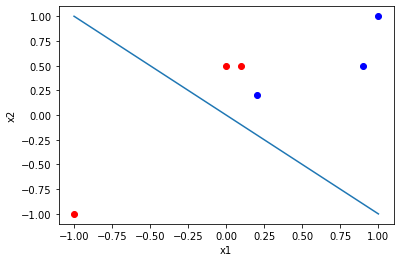



Step 2:
x=[-1. -1.] y=-1 pred_y=-1 weight = [1. 1.]
Weight Remained Same 

 Plot for Step2


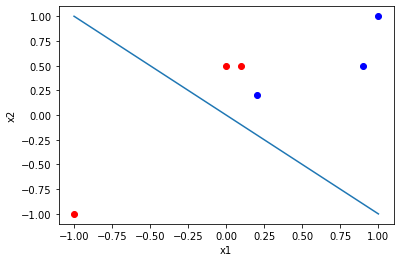



Step 3:
x=[0.  0.5] y=-1 pred_y=1 weight = [1. 1.]
weight decreased
Weight Changed
Weight = [1.  0.5]  

 Plot for Step3


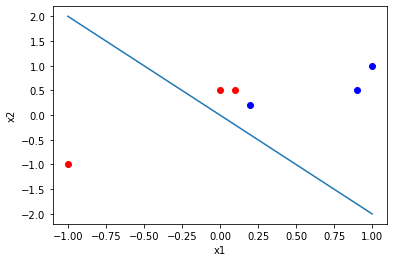



Step 4:
x=[0.1 0.5] y=-1 pred_y=1 weight = [1.  0.5]
weight decreased
Weight Changed
Weight = [0.9 0. ]  

 Plot for Step4


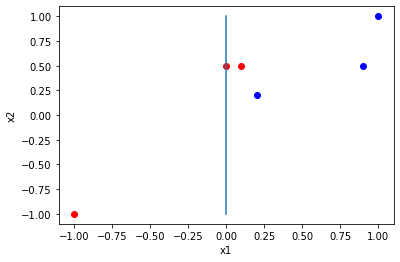



Step 5:
x=[0.2 0.2] y=1 pred_y=1 weight = [0.9 0. ]
Weight Remained Same 

 Plot for Step5


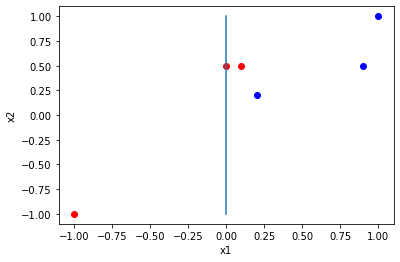



Step 6:
x=[0.9 0.5] y=1 pred_y=1 weight = [0.9 0. ]
Weight Remained Same 

 Plot for Step6


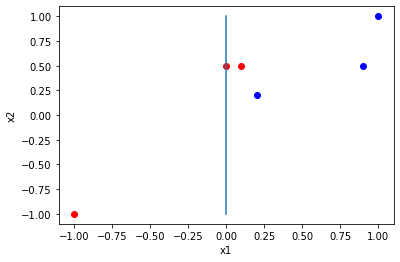



Step 7:
x=[1. 1.] y=1 pred_y=1 weight = [0.9 0. ]
Weight Remained Same 

 Plot for Step7


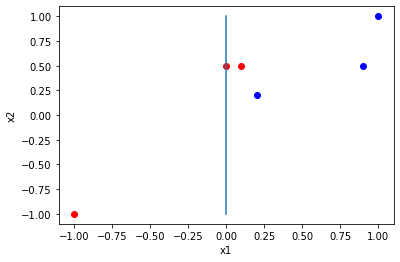



Step 8:
x=[-1. -1.] y=-1 pred_y=-1 weight = [0.9 0. ]
Weight Remained Same 

 Plot for Step8


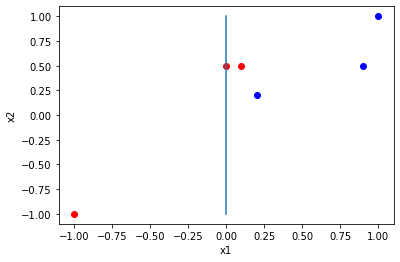



Step 9:
x=[0.  0.5] y=-1 pred_y=1 weight = [0.9 0. ]
weight decreased
Weight Changed
Weight = [ 0.9 -0.5]  

 Plot for Step9


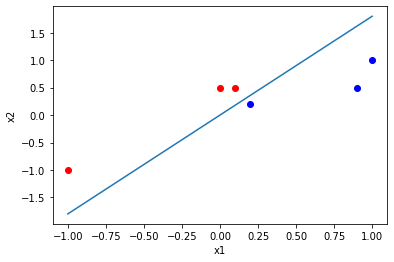



Reached Convergence
Steps till Convergence = 9


In [ ]:
perceptron = Perceptron()

wt_matrix, steps = perceptron.fit(X, Y)


## Question
1. In how many steps perception learning algorithm will converge?
- Assuming that we define steps as number of times the model sees any data point, the model converged in 9 steps.

# Final Decision Boundary After Convergence

In [ ]:
wt_matrix

array([[ 1. ,  0.5],
       [ 0.9,  0. ],
       [ 0.9, -0.5]])

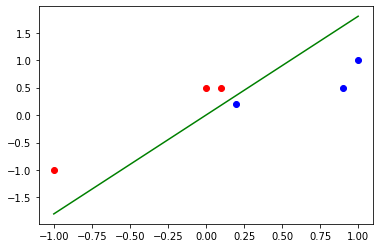

In [ ]:
x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])
plt.scatter(X[Y==-1,0], X[Y==-1,1], c='r', label='Negative')
plt.scatter(X[Y==1,0], X[Y==1,1], c='b', label='Positive')
w = wt_matrix[-1]
y1 = -w[0]*x1/w[1]    
plt.plot(x1,y1,c='g')
